## Handwritten English Letter Recognition using Convolutional Neural Networks

### Arunima Divya
### AM.EN.U4AIE19016

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# Reading the .csv file
data = pd.read_csv(r"/Users/aruni/Documents/HandwritingRecog/A_Z Handwritten Data.csv").astype('float32')

In [3]:
X = data.drop('0',axis = 1)
y = data['0']

In [4]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Training data shape: ", train_x.shape)
print("Testing data shape: ", test_x.shape)

Training data shape:  (297960, 28, 28)
Testing data shape:  (74490, 28, 28)


In [5]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

A : 13869
B : 8668
C : 23409
D : 10134
E : 11440
F : 1163
G : 5762
H : 7218
I : 1120
J : 8493
K : 5603
L : 11586
M : 12336
N : 19010
O : 57825
P : 19341
Q : 5812
R : 11566
S : 48419
T : 22495
U : 29008
V : 4182
W : 10784
X : 6272
Y : 10859
Z : 6076


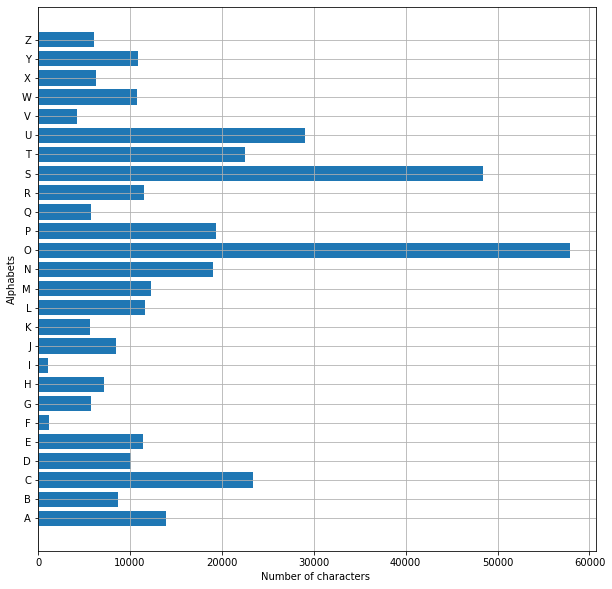

In [6]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1
alphabets = []
for i in word_dict.values():
    alphabets.append(i)
for a in range(len(alphabets)):
    print("{} : {}".format(alphabets[a], count[a]))
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of characters ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

In [7]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print(train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print(test_X.shape)

(297960, 28, 28, 1)
(74490, 28, 28, 1)


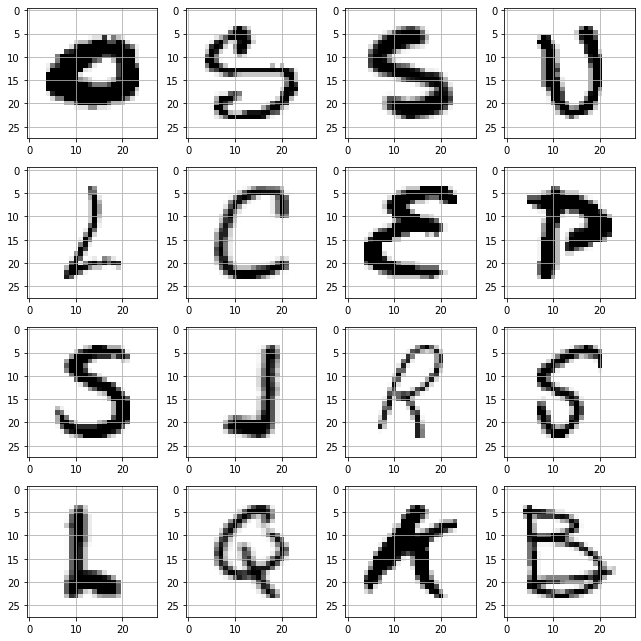

In [8]:
#Example images
fig, axes = plt.subplots(4,4, figsize=(9,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    ax.grid()
    
fig.tight_layout(pad=1.0)

In [9]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print(train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print(test_yOHE.shape)

(297960, 26)
(74490, 26)


In [10]:
#Designing the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dropout(0.2))
model.add(Dense(26,activation ="softmax"))

In [11]:
#Fitting and Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_X, train_yOHE, validation_data=(test_X,test_yOHE), epochs=20, batch_size=200, verbose=2)

scores = model.evaluate(test_X,test_yOHE, verbose=0)
print("CNN Score:",scores[1])
model.save(r'/Users/aruni/Documents/HandwritingRecog/model_hand.h5')

Train on 297960 samples, validate on 74490 samples
Epoch 1/20
 - 225s - loss: 0.4195 - accuracy: 0.8940 - val_loss: 0.0770 - val_accuracy: 0.9783
Epoch 2/20
 - 239s - loss: 0.0885 - accuracy: 0.9753 - val_loss: 0.0525 - val_accuracy: 0.9857
Epoch 3/20
 - 240s - loss: 0.0685 - accuracy: 0.9808 - val_loss: 0.0577 - val_accuracy: 0.9847
Epoch 4/20
 - 240s - loss: 0.0594 - accuracy: 0.9832 - val_loss: 0.0484 - val_accuracy: 0.9870
Epoch 5/20
 - 240s - loss: 0.0534 - accuracy: 0.9849 - val_loss: 0.0426 - val_accuracy: 0.9885
Epoch 6/20
 - 240s - loss: 0.0485 - accuracy: 0.9864 - val_loss: 0.0452 - val_accuracy: 0.9885
Epoch 7/20
 - 240s - loss: 0.0447 - accuracy: 0.9873 - val_loss: 0.0392 - val_accuracy: 0.9903
Epoch 8/20
 - 239s - loss: 0.0410 - accuracy: 0.9881 - val_loss: 0.0377 - val_accuracy: 0.9907
Epoch 9/20
 - 240s - loss: 0.0386 - accuracy: 0.9890 - val_loss: 0.0439 - val_accuracy: 0.9884
Epoch 10/20
 - 238s - loss: 0.0359 - accuracy: 0.9897 - val_loss: 0.0367 - val_accuracy: 0.991

In [12]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 128)        

In [13]:
#Accuracy and Loss
val_acc = history.history['val_accuracy']
acc = history.history['accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
print("The validation accuracy is :", val_acc)
print("The training accuracy is :", acc)
print("The validation loss is :", val_loss)
print("The training loss is :", train_loss)

The validation accuracy is : [0.9782924056053162, 0.9857296347618103, 0.9847496151924133, 0.9870184063911438, 0.9884548187255859, 0.9884548187255859, 0.9903342723846436, 0.9906967282295227, 0.9884414076805115, 0.9912202954292297, 0.990871250629425, 0.992401659488678, 0.9913008213043213, 0.9925493597984314, 0.9904147982597351, 0.99269700050354, 0.9920257925987244, 0.9929923415184021, 0.993448793888092, 0.9931937456130981]
The training accuracy is : [0.8940361, 0.9753356, 0.9808095, 0.98320913, 0.98490065, 0.9864479, 0.98726004, 0.98813933, 0.989022, 0.98969996, 0.9902336, 0.99114984, 0.99121696, 0.9916969, 0.99189824, 0.9917237, 0.9925426, 0.9925762, 0.9926366, 0.99265337]
The validation loss is : [0.07703930665928296, 0.05247543159917803, 0.057654769174856645, 0.04836972108292574, 0.042553856329056464, 0.0452164036664021, 0.03917280332957867, 0.037715386395946654, 0.043899376415366884, 0.03674628029562181, 0.03718814975197607, 0.0349143492416101, 0.03707138792288965, 0.0314012704555842

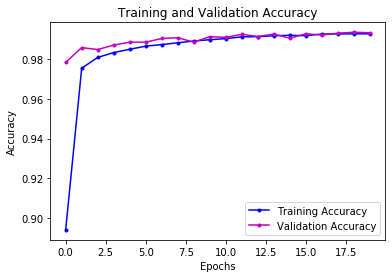

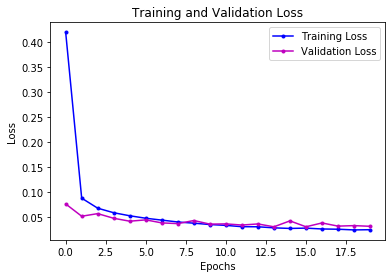

In [29]:
#Plotting accuracy and loss
plt.plot(epochs, acc, '-bo',markersize=3, label='Training Accuracy')
plt.plot(epochs, val_acc, '-mo',markersize=3, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, train_loss, '-bo', markersize=3,label='Training Loss')
plt.plot(epochs, val_loss, '-mo', markersize=3,label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

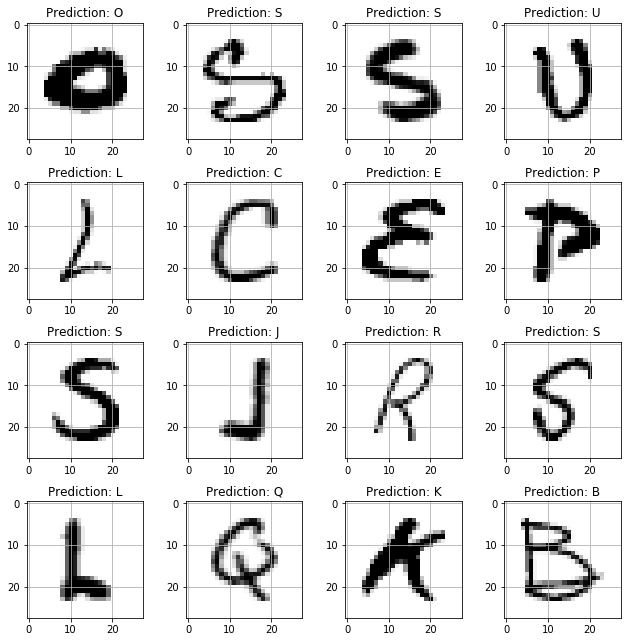

In [30]:
#Images with predicted labels
pred = model.predict(test_X[:16])
fig, axes = plt.subplots(4,4, figsize=(9,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()
fig.tight_layout(pad=1.0)